In [ ]:
import sys
!{sys.executable} -m pip install tensorflow --user

In [1]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

X_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples
Epoch 1/12
469/469 [==============================] - 139s 296ms/step - loss: 2.2809 - accuracy: 0.1838 - val_loss: 2.2527 - val_accuracy: 0.4187
Epoch 2/12
469/469 [==============================] - 142s 303ms/step - loss: 2.2270 - accuracy: 0.3213 - val_loss: 2.1770 - val_accuracy: 0.5776
Epoch 3/12
469/469 [==============================] - 146s 311ms/step - loss: 2.1268 - accuracy: 0.4354 - val_loss: 2.0216 - val_accuracy: 0.6678
Epoch 4/12
469/469 [==============================] - 142s 303ms/step - loss: 1.9104 - accuracy: 0.5233 - val_loss: 1.6655 - val_accuracy: 0.7385
Epoch 5/12
469/469 [==============================] - 137s 291ms/step - loss: 1.5210 - accuracy: 0.5991 - val_loss: 1.1457 - val_accuracy: 0.7859
Epoch 6/12
469/469 [==============================] - 141s 301ms/step - loss: 1.1654 - accuracy: 0.6580 - val_loss: 0.8200 - val_accuracy: 0.8164
Epoch 7/12
469/469 [=========================

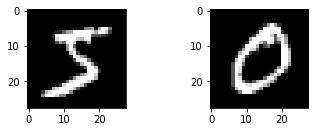

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# import matplotlib for visualization
import matplotlib.pyplot as plt

# plot 2 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
batch_size = 128
num_classes = 10
epochs = 12


# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first': 
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: 
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'testing samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# import TensorFlow backend
import tensorflow as tf

# define our model
model = Sequential()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))


model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))


score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])